In [1]:
import os
import sys
import random 

import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
from functools import partial
import matplotlib.pyplot as plt 
import albumentations as albu

sys.path.append("..")

from IPython import display

# %load_ext autoreload
# %autoreload 2

In [2]:
# sys.path.append("/home/zakirov/repoz/metrics-comparison/")
# sys.path.append("../")

## Download datasets

In [3]:
# mnist = torchvision.datasets.MNIST("../datasets", train=True, download=True)
# cifar10 = torchvision.datasets.CIFAR10("../datasets", download=True)
# cifar100 = torchvision.datasets.CIFAR100("../datasets", download=True)

In [4]:
# !wget -P datasets/ http://cs231n.stanford.edu/tiny-imagenet-200.zip
# !wget -P datasets/ http://vllab.ucmerced.edu/wlai24/LapSRN/results/SR_testing_datasets.zip
# !wget -P datasets/ http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-100/coil-100.zip
# !wget -P datasets/ http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip
# !wget -P datasets/ http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip

## Test datasets

In [2]:
from src.augmentations import get_aug
from src.utils import walk_files
from src.datasets import *
from torch.utils.data import Dataset

In [3]:
transform = get_aug(aug_type="light", task="sr", size=128)
target_transform =  get_aug("val", None, size=128)

tiny = TinyImageNet(train=True, transform=transform)
mnist = MNIST(root="datasets/", train=True, transform=transform)
cifar10 = CIFAR10(root="datasets/", train=True, transform=transform)
cifar100 = CIFAR100(root="datasets/", train=True, transform=transform)
div2k = DIV2KDataset(train=False, transform=transform)
set5 = Set5(train=False, transform=transform)
set14 = Set14(train=False, transform=transform)
urban100 = Urban100(train=False, transform=transform)
manga109 = Manga109(train=False, transform=transform)
bsds100 = BSDS100(train=False, transform=transform)

datasets = [tiny, mnist, cifar10, cifar100, div2k, set5, set14, urban100, manga109, bsds100]

NameError: name 'DIV2KDataset' is not defined

Input torch.Size([3, 64, 64]) tensor(0.0078) tensor(0.9608)
Target torch.Size([3, 128, 128]) tensor(0.) tensor(0.9922)


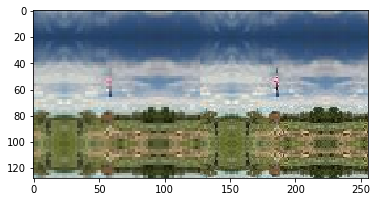

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets/
    Split: Train
    StandardTransform
Transform: Compose([
             Compose([
               PadIfNeeded(always_apply=False, p=1.0, min_height=128, min_width=128, border_mode=4, value=None, mask_value=None),
               RandomResizedCrop(always_apply=False, p=1.0, height=128, width=128, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1),
             ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}),
             OneOf([
               Downscale(always_apply=False, p=0.5, scale_min=0.5, scale_max=0.5, interpolation=0),
             ], p=1.0),
             Compose([
               Normalize(always_apply=False, p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0),
               ToTensorV2(always_apply=True, p=1.0),
             ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={'mask': 'image'}),
           ], p=1.0, bbox_para

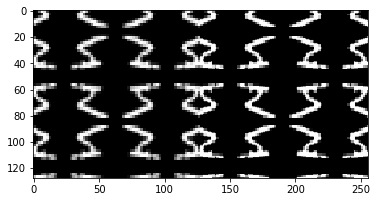

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: datasets/
    Split: Train
    StandardTransform
Transform: Compose([
             Compose([
               PadIfNeeded(always_apply=False, p=1.0, min_height=128, min_width=128, border_mode=4, value=None, mask_value=None),
               RandomResizedCrop(always_apply=False, p=1.0, height=128, width=128, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1),
             ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}),
             OneOf([
               Downscale(always_apply=False, p=0.5, scale_min=0.5, scale_max=0.5, interpolation=0),
             ], p=1.0),
             Compose([
               Normalize(always_apply=False, p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0),
               ToTensorV2(always_apply=True, p=1.0),
             ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={'mask': 'image'}),
           ], p=1.0, bbox_pa

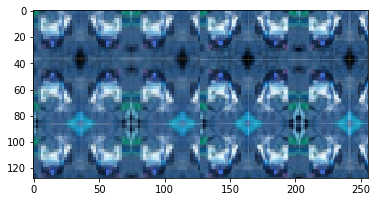

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: datasets/
    Split: Train
    StandardTransform
Transform: Compose([
             Compose([
               PadIfNeeded(always_apply=False, p=1.0, min_height=128, min_width=128, border_mode=4, value=None, mask_value=None),
               RandomResizedCrop(always_apply=False, p=1.0, height=128, width=128, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1),
             ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}),
             OneOf([
               Downscale(always_apply=False, p=0.5, scale_min=0.5, scale_max=0.5, interpolation=0),
             ], p=1.0),
             Compose([
               Normalize(always_apply=False, p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0),
               ToTensorV2(always_apply=True, p=1.0),
             ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={'mask': 'image'}),
           ], p=1.0, bbox_p

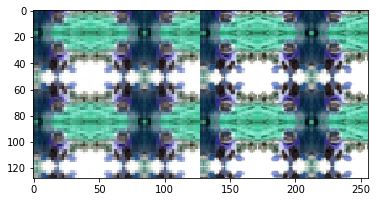

Input torch.Size([3, 64, 64]) tensor(0.) tensor(1.)
Target torch.Size([3, 128, 128]) tensor(0.) tensor(1.)


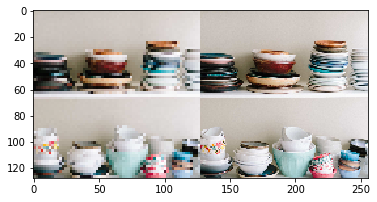

Input torch.Size([3, 64, 64]) tensor(0.0157) tensor(0.9922)
Target torch.Size([3, 128, 128]) tensor(0.0157) tensor(0.9922)


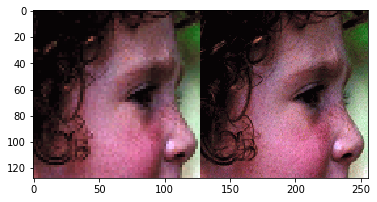

Input torch.Size([3, 64, 64]) tensor(0.) tensor(0.9059)
Target torch.Size([3, 128, 128]) tensor(0.) tensor(0.9137)


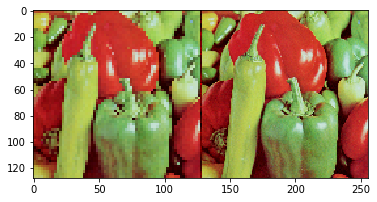

Input torch.Size([3, 64, 64]) tensor(0.0118) tensor(1.)
Target torch.Size([3, 128, 128]) tensor(0.) tensor(1.)


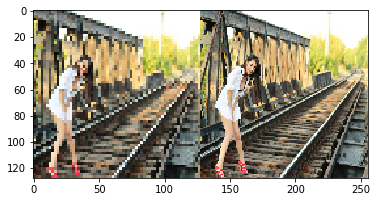

Input torch.Size([3, 64, 64]) tensor(0.) tensor(1.)
Target torch.Size([3, 128, 128]) tensor(0.) tensor(1.)


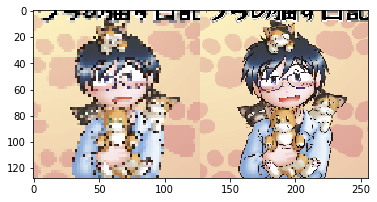

Input torch.Size([3, 64, 64]) tensor(0.1098) tensor(1.)
Target torch.Size([3, 128, 128]) tensor(0.0980) tensor(1.)


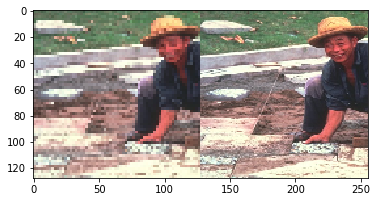

In [7]:
# for dataset in datasets:
#     print(dataset)
#     input, target = dataset[0]
#     print("Input", input.shape, input.min(), input.max())
#     print("Target", target.shape, target.min(), target.max())
#     input = input.unsqueeze(0)
#     input = F.interpolate(input, size=target.shape[-2:])
#     input.squeeze_()
#     plt.imshow(torch.cat([input, target], dim=2).permute(1, 2, 0))
#     plt.show()
    

## Test dataloaders

In [4]:
from src.datasets import get_dataloader

In [5]:
datasets = ["mnist", "cifar10", "cifar100", "tinyimagenet", "div2k"]
transform = get_aug(aug_type="light", task="deblur", size=128)

for dataset in datasets:
    train_loader = get_dataloader(dataset, transform, train=True)
    val_loader = get_dataloader(dataset, transform, train=False)


Using datasets: mnist. Train size: 60000.

Using datasets: mnist. Validation size: 10000.

Using datasets: cifar10. Train size: 50000.

Using datasets: cifar10. Validation size: 10000.

Using datasets: cifar100. Train size: 100000.

Using datasets: cifar100. Validation size: 20000.

Using datasets: tinyimagenet. Train size: 100000.

Using datasets: tinyimagenet. Validation size: 10000.

Using datasets: div2k. Train size: 800.

Using datasets: div2k. Validation size: 100.


In [27]:
import photosynthesis_metrics as pm
image_metrics = ["kid", {}, "ssim", {}, ]

METRIC_FROM_NAME = {
    "ssim" : pm.SSIMLoss,
    "ms-ssim" : pm.MultiScaleSSIMLoss,
    "msid" : pm.MSID,
    "fid" : pm.FID,
    "kid" : pm.KID,
#     "content" : ContentLoss,
#     "style" : StyleLoss,
    "tv" : pm.TVLoss,
}


# for metric in image_metrics:
image_metrics = [METRIC_FROM_NAME[metric](**kwargs) for metric, kwargs in zip(image_metrics[::2], image_metrics[1::2])]
# list(zip(image_metrics[::2], image_metrics[1::2]))
image_metrics

[KID(), SSIMLoss()]

In [30]:
from collections import OrderedDict
output = OrderedDict({
    'loss': 1,
#     'mse': mse,
#     'psnr': psnr,
#     'ssim': ssim_score,
#     # 'val_ms_ssim': ms_ssim_score,
#     'input_features': input_features,
#     'target_features': target_features
})
output["test"] = 3
output["foo"] = "bar"

'bar'

In [ ]:
# from functools import b
# 
iter()

In [38]:
a = ["foo", "bar"]
if "foo" in a:
    print(a.index("foo"))
# a.append("loss")
# print(a)
# a.pop()
# a
# for i in "etc", a:
#     print(i)

0


In [8]:
features = make_layers(
    [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"], 
    batch_norm=True
)
vgg_16 = VGG(features)

In [9]:
vgg_16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [12]:
x = torch.rand(10, 3, 224, 224)
layers = None
if layers is None:
    layers = ["0", "5", "10", "19", "28"]

features = []
for name, module in vgg_16.features._modules.items():
    x = module(x)
    if name in layers:
        features.append(x)


In [13]:
features

[tensor([[[[-7.8670e-02, -1.6354e-01, -1.2225e-01,  ..., -1.4535e-01,
            -1.4584e-01, -1.6412e-01],
           [-1.6184e-01, -2.3506e-01, -3.1266e-01,  ..., -2.0155e-01,
            -2.6703e-01, -3.7117e-02],
           [-3.3386e-01, -3.5759e-01, -4.1006e-01,  ..., -3.3040e-01,
            -2.0890e-01, -2.0440e-01],
           ...,
           [-2.2252e-01, -2.0513e-01, -3.3348e-01,  ..., -3.6601e-01,
            -3.3097e-01, -1.7747e-01],
           [-2.3798e-01, -2.9009e-01, -3.2904e-01,  ..., -2.8494e-01,
            -1.1763e-01, -1.4277e-01],
           [-1.4894e-01, -5.6518e-02, -1.3160e-01,  ..., -8.2170e-02,
            -2.6207e-01,  3.9249e-02]],
 
          [[ 2.9822e-02, -3.8332e-02,  5.3954e-03,  ...,  1.5230e-01,
             4.5484e-03,  4.9021e-02],
           [-7.7623e-02, -9.5545e-02,  3.3520e-02,  ..., -1.7780e-02,
             5.4646e-02,  2.8361e-03],
           [ 1.0605e-02, -1.2710e-01, -1.5536e-01,  ..., -6.8971e-03,
            -8.9209e-02,  1.6279e-03],


In [9]:
# from albumentations import ImageOnlyTransform
albu.ImageCompression()

In [112]:
target.permute(2, 0, 1).shape, input.shape

(torch.Size([3, 512, 512]), torch.Size([3, 512, 512]))

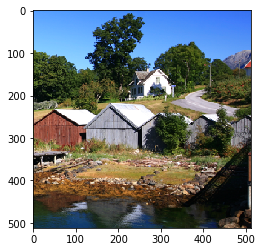

In [113]:
plt.imshow(target.permute(2, 0, 1).transpose(0, 2).transpose(0, 1))

In [70]:
dataset = TinyImageNetDataset(train=True, transform=None, target_transform=None)
input, target = dataset[6]
# input.shape
# plt.imshow(input / 255.)
(input / 255.).min(), (input / 255.).max()

(0.0, 1.0)

In [46]:
input.transpose(0, 2).transpose(0, 1).shape

torch.Size([64, 64, 3])

In [37]:
# dataset[0][0].shape

(64, 64, 3)

In [7]:
# from src.augmentations import get_aug
# from src.datasets import MNIST, CIFAR10, CIFAR100
from ..src.datasets
# from src.datasets import get_dataloader

ModuleNotFoundError: No module named 'src.datasets'

In [ ]:
transform = get_aug(aug_type="light", size=32)
target_transform = get_aug(aug_type="val", size=32)
# target_transform = None

In [ ]:
transform, target_transform

In [ ]:
trainset = CIFAR10(root='../datasets', train=True, transform=transform, target_transform=target_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

# valset = CIFAR10(root='../datasets', train=False, transform=transform, target_transform=target_transform)
# valloader = torch.utils.data.DataLoader(valset, batch_size=16,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
image, target = trainset[0]
print(image.shape, target.shape)
print(image.max(), image.min())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
input, target = dataiter.next()

In [ ]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        return x

In [ ]:
model = torchvision.models.resnet18(pretrained=True)

model.fc = Identity()
model.to("cpu")

In [ ]:
mock = torch.rand((3, 3, 32, 32))

In [ ]:
result = model(mock)

In [ ]:
all_input_features = [result.detach() for _ in range(4)]
print(len(all_input_features))

In [ ]:
input_features = torch.cat(all_input_features, dim=0)
input_features.shape

In [ ]:
input.shape, target.shape

In [ ]:
class HDRLoss(nn.Module):
    """High dynamic range loss."""

    def __init__(self, eps=0.01):
        """Initializes loss with numerical stability epsilon."""

        super(HDRLoss, self).__init__()
        self._eps = eps


    def forward(self, denoised, target):
        """Computes loss by unpacking render buffer."""

        loss = ((denoised - target) ** 2) / (denoised + self._eps) ** 2
        return loss.mean(dim=[1,2,3])

In [ ]:
hdr = HDRLoss()

In [ ]:
loss = hdr(target+ 0.001, target)
print(loss.shape)

In [ ]:
loss

In [ ]:
# show images
print(images.shape)
grid = torchvision.utils.make_grid(images[:16])
print(grid.shape)
imshow(grid)

In [ ]:
imshow(torchvision.utils.make_grid(target))

In [ ]:

# plt.imshow(image[:, :, 0])

In [ ]:
import photosynthesis_metrics as pm